## FASE 0. PREPARACIÓN DEL ENTORNO VIRTUAL Y PAQUETERÍAS DE ML-IA

In [ ]:
# CREACION DE ENTORNO VIRTUAL 

##Creación del entorno
    #python -m venv bolivar_parte2_final-env   # This creates an virtual environment named "titanic_entorno-env"

## Inicialización del entorno
    #bolivar_parte2_final-env\Scripts\activate


#COMPROBAR QUE SE ESTÁ EN EL ENTORNO VIRTUAL Y EN LA CARPETA DEL ENTORNO VIRTUAL



#INSTALACIÓN DE LIBRERIAS
# pip install ipykernel
#python -m ipykernel install --user --name=bolivar_parte2_final-env-env ///Installed kernelspec bolivar_prueba-env in C:\Users\smart\AppData\Roaming\jupyter\kernels\bolivar_prueba-env

# pip install langchain openai faiss-cpu pypdf tiktoken python-dotenv streamlit sentence-transformers transformers torch pdfplumber matplotlib seaborn wordcloud nltk deeptranslator



In [4]:
import pdfplumber
import re

# Ruta del archivo PDF
pdf_path = 'D:/CHECHO/Codigo_Prueba_SegurosBolivar/GallagherRe Global Insurtech Report 2024-Q4.pdf'

# Función para extraer el texto del PDF
def extract_pdf_text(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        full_text = ""
        for page_num, page in enumerate(pdf.pages[5:], start=6):  # Comienza desde la página 6
            page_text = page.extract_text()
            full_text += f"Page {page_num}\n" + page_text + "\n"  # Añadir número de página al texto
    return full_text

# Función para dividir el texto en líneas
def split_text_into_lines(text):
    return text.split('\n')

# Función para limpiar caracteres extraños
def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s\.,-]', '', text)

# Función para limpiar el texto (eliminar números, caracteres especiales y corregir errores comunes)
def limpiar_texto(texto):
    texto = re.sub(r'\d+', '', texto)  # Elimina números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)  # Elimina caracteres especiales
    texto = re.sub(r'gnidnuF', 'Funding', texto)  # Ejemplo de palabra invertida
    texto = re.sub(r'snoillim', 'million', texto)  # Otro ejemplo
    texto = re.sub(r'emuloV', 'Volume', texto)  # Error tipográfico común
    texto = re.sub(r'^\s*Sección:.*\n', '', texto)  # Elimina títulos de sección
    texto = re.sub(r'Q\d', '', texto)  # Elimina patrones de tipo Q1, Q2, etc.
    return texto

# Función para extraer el contenido y las páginas del documento
def extract_sections_and_pages(lines):
    sections = []
    current_content = []
    current_page = None
    for line in lines:
        line = line.strip()
        
        # Detectamos el número de página al final de la línea
        page_match = re.search(r'Page (\d+)', line)
        if page_match:
            page_number = page_match.group(1)
            if current_page:
                # Cuando encontramos un número de página, almacenamos el contenido acumulado
                sections.append((current_page, current_content))
            current_page = page_number  # Establecer el nuevo número de página
            current_content = []  # Limpiar el contenido acumulado para la siguiente página
        else:
            # Acumulamos el contenido que no es un número de página
            cleaned_line = limpiar_texto(line)
            if cleaned_line:  # Sólo añadir líneas no vacías
                current_content.append(cleaned_line)
    
    # Agregar el último contenido después del último número de página
    if current_page:
        sections.append((current_page, current_content))
    
    return sections

# Función para generar los "chunks" de contenido
def generate_chunks(sections):
    chunks = []
    for page, content in sections:
        chunk = {
            'page': page,
            'content': '\n'.join(content)
        }
        chunks.append(chunk)
    return chunks

# Función para buscar títulos clave dentro del contenido de la página
def find_key_sections_in_content(content):
    patterns = [
        r'(Introduction|Funding|InsurTech|Global|Trends|AI|Innovation|Emerging)',  
        r'(Quarterly\sInsurTech\sFunding)',  
        r'(Life\sand\sHealth|Property\sand\sCasualty)',  
        r'(AIcentered\sInsurTechs)',  
        r'(InsurTech\scompanies)',  
    ]
    
    sections_found = []
    
    # Buscar todas las coincidencias
    for pattern in patterns:
        matches = re.findall(pattern, content, re.IGNORECASE)
        sections_found.extend(matches)
    
    return sections_found

# Aplicar la detección de secciones clave en todos los "chunks"
def find_sections_in_chunks_v3(chunks):
    sections = []
    for chunk in chunks:
        key_sections = find_key_sections_in_content(chunk['content'])
        if key_sections:
            sections.append({
                'page': chunk['page'],
                'key_sections': key_sections
            })
    return sections

# Función principal
def main(pdf_path):
    text = extract_pdf_text(pdf_path)  # Extraer el texto del PDF
    lines = split_text_into_lines(text)  # Dividir el texto en líneas
    sections = extract_sections_and_pages(lines)  # Identificar secciones y páginas
    chunks = generate_chunks(sections)  # Generar los "chunks"
    
    # Ejecutar la detección de secciones clave en los "chunks"
    sections_found_v2 = find_sections_in_chunks_v3(chunks)

    return sections_found_v2

# Ejecutar el proceso
sections_found_v2 = main(pdf_path)

# Mostrar las secciones encontradas
for section in sections_found_v2:
    print(f"Página {section['page']}:")
    print(f"Secciones clave encontradas: {section['key_sections']}\n")


Página 6:
Secciones clave encontradas: ['Introduction', 'Global', 'InsurTech', 'funding', 'ai', 'InsurTech', 'funding', 'AI', 'ai', 'AI', 'InsurTech', 'AI', 'InsurTech', 'InsurTech', 'InsurTech', 'ai', 'AI', 'AI', 'InsurTech', 'ai', 'AI', 'global', 'InsurTech', 'funding', 'InsurTech', 'ai', 'AI', 'Global', 'InsurTech', 'AI', 'funding', 'AI', 'InsurTech', 'ai', 'ai', 'InsurTech', 'InsurTech', 'ai', 'funding', 'funding', 'AIcentered InsurTechs']

Página 7:
Secciones clave encontradas: ['Introduction', 'AI', 'InsurTech', 'ai', 'ai', 'funding', 'InsurTech', 'AI', 'AI', 'AI', 'InsurTech', 'InsurTech', 'ai', 'InsurTech', 'InsurTech', 'ai', 'ai', 'InsurTech companies']

Página 8:
Secciones clave encontradas: ['Global', 'InsurTech', 'funding', 'Global', 'InsurTech', 'funding', 'funding', 'InsurTech', 'funding', 'InsurTech', 'funding', 'InsurTech', 'Funding', 'InsurTech', 'global', 'InsurTech', 'funding', 'funding', 'InsurTech', 'funding', 'InsurTech', 'funding', 'funding', 'funding', 'InsurTec

In [ ]:
import pdfplumber
import re


# Tabla de contenido como palabras clave
TOC_SECTIONS = [
    "Introduction", "data highlights", "InsurTech Team Corner", "Renting Technology", 
    "Buying", "Building", "InsurTech Case Studies", "Nearmap", "EvolutionIQ", "Pindrop", 
    "Deal of the Quarter", "Agentech", "Partnership Case Study", "Loadsure", "Google Cloud", 
    "Incumbent Corner", "Concirrus", "United Risk", "Gallagher's Vision", "Joe Powell", 
    "Gallagher Basset", "Thought Leadership", "Cristina Lucas", "Guidewire", "Investor Corner", 
    "Matthew Jones", "Transverse Ventures", "The Data Center", "quarter highlights"
]

# Precompilamos expresiones regulares
toc_patterns = [re.compile(re.escape(section), re.IGNORECASE) for section in TOC_SECTIONS]

# Funciones para procesamiento de PDF
def extract_text_from_pages(pdf_path, page_range):
    with pdfplumber.open(pdf_path) as pdf:
        full_text = ""
        for i in page_range:
            if i - 1 < len(pdf.pages):
                page = pdf.pages[i - 1]  # pdfplumber es 0-indexed
                page_text = page.extract_text()
                if page_text:
                    full_text += f"Page {i}\n" + page_text + "\n"
    return full_text

def limpiar_texto(texto):
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    texto = re.sub(r'gnidnuF', 'Funding', texto)
    texto = re.sub(r'snoillim', 'million', texto)
    texto = re.sub(r'emuloV', 'Volume', texto)
    texto = re.sub(r'^\s*Sección:.*\n', '', texto)
    texto = re.sub(r'Q\d', '', texto)
    return texto

def extract_sections_and_pages(pdf_path, sections_dict):
    result = {}
    for section, page_range in sections_dict.items():
        text = extract_text_from_pages(pdf_path, page_range)
        cleaned_text = limpiar_texto(text)
        result[section] = cleaned_text
    return result

# Definir las páginas específicas para cada sección
secciones_pdf = {
    "Introduction": list(range(6, 22)) + [111],
    "data highlights": list(range(6, 22)) + [111],
    "InsurTech Team Corner": list(range(26, 32)),
    "Renting Technology": list(range(26, 32)),
    "Buying": list(range(26, 32)),
    "Building": list(range(26, 32)),
    "InsurTech Case Studies": list(range(32, 40)),
    "Nearmap": list(range(32, 40)),
    "EvolutionIQ": list(range(32, 40)),
    "Pindrop": list(range(32, 40)),
    "Deal of the Quarter": list(range(40, 46)),
    "Agentech": list(range(40, 46)),
    "Partnership Case Study": list(range(47, 52)),
    "Loadsure": list(range(47, 52)),
    "Google Cloud": list(range(47, 52)),
    "Incumbent Corner": list(range(53, 58)),
    "Concirrus": list(range(53, 58)),
    "United Risk": list(range(53, 58)),
    "Gallagher's Vision": list(range(58, 64)),
    "Joe Powell": list(range(58, 64)),
    "Gallagher Basset": list(range(58, 64)),
    "Thought Leadership": list(range(65, 68)),
    "Cristina Lucas": list(range(65, 68)),
    "Guidewire": list(range(65, 68)),
    "Investor Corner": list(range(69, 74)),
    "Matthew Jones": list(range(69, 74)),
    "Transverse Ventures": list(range(69, 74)),
    "The Data Center": list(range(75, 111)) + list(range(112, 116)),
    "quarter highlights": list(range(75, 111)) + list(range(112, 116))
}

# Función principal para procesar y guardar las secciones
def main():
    # Extraer el texto de cada sección utilizando las páginas especificadas
    texto_secciones = extract_sections_and_pages(pdf_path, secciones_pdf)
    
    # Guardar cada sección extraída en un archivo .txt
    for nombre, contenido in texto_secciones.items():
        nombre_archivo = nombre.replace(" ", "_") + ".txt"
        with open(nombre_archivo, "w", encoding="utf-8") as f:
            f.write(contenido)

    return texto_secciones






In [3]:
# Llamada a la función principal
secciones_texto = main()

In [7]:
secciones_pdf = {
    "Introduction": list(range(6, 22)) + [111],
    "data highlights": list(range(6, 22)) + [111],
    "InsurTech Team Corner": list(range(26, 32)),
    "Renting Technology": list(range(26, 32)),
    "Buying": list(range(26, 32)),
    "Building": list(range(26, 32)),
    "InsurTech Case Studies": list(range(32, 40)),
    "Nearmap": list(range(32, 40)),
    "EvolutionIQ": list(range(32, 40)),
    "Pindrop": list(range(32, 40)),
    "Deal of the Quarter": list(range(40, 46)),
    "Agentech": list(range(40, 46)),
    "Partnership Case Study": list(range(47, 52)),
    "Loadsure": list(range(47, 52)),
    "Google Cloud": list(range(47, 52)),
    "Incumbent Corner": list(range(53, 58)),
    "Concirrus": list(range(53, 58)),
    "United Risk": list(range(53, 58)),
    "Gallagher's Vision": list(range(58, 64)),
    "Joe Powell": list(range(58, 64)),
    "Gallagher Basset": list(range(58, 64)),
    "Thought Leadership": list(range(65, 68)),
    "Cristina Lucas": list(range(65, 68)),
    "Guidewire": list(range(65, 68)),
    "Investor Corner": list(range(69, 74)),
    "Matthew Jones": list(range(69, 74)),
    "Transverse Ventures": list(range(69, 74)),
    "The Data Center": list(range(75, 111)) + list(range(112, 116)),
    "quarter highlights": list(range(75, 111)) + list(range(112, 116))
}


In [26]:
import os
import pandas as pd

# Ruta donde tienes los archivos .txt
ruta_archivos = "D:/CHECHO/Codigo_Prueba_SegurosBolivar/bolivar_parte2-env"  

# Lista de archivos .txt
archivos_txt = [f for f in os.listdir(ruta_archivos) if f.endswith('.txt')]

# Crear una lista para almacenar los datos
secciones = []
contenidos = []

# Leer cada archivo .txt y almacenar la sección y el contenido
for archivo in archivos_txt:
    # Extraer el nombre de la sección (sin la extensión .txt)
    seccion = archivo.replace(".txt", "")
    
    # Leer el contenido del archivo
    with open(os.path.join(ruta_archivos, archivo), "r", encoding="utf-8") as file:
        contenido = file.read()
    
    # Añadir la sección y el contenido a las listas
    secciones.append(seccion)
    contenidos.append(contenido)

# Crear un DataFrame con las listas
df = pd.DataFrame({
    'Sección': secciones,
    'Contenido': contenidos
})

# Mostrar el DataFrame
print(df.head())  # Muestra las primeras filas para revisar

# Guardar el DataFrame a un archivo CSV si lo deseas
#df.to_csv("contenido_secciones.csv", index=False)


               Sección                                          Contenido
0             Agentech  Page \nDeal of the Quarter\n\nPage \nDeal of t...
1             Building  Page \nGallagher Res\nInsurTech Team Corner\n\...
2  Building_Technology  Building technology in-house:\nthen the insura...
3               Buying  Page \nGallagher Res\nInsurTech Team Corner\n\...
4    Buying_Technology  Buying technology: Leveraging proven Another k...


In [27]:
# Limpiar el contenido (quitar saltos de línea o caracteres no deseados)
df['Contenido'] = df['Contenido'].str.replace(r'[\n\r]+', ' ', regex=True)  # Eliminar saltos de línea y caracteres no deseados


In [28]:
df

,Sección,Contenido
0,Agentech,Page Deal of the Quarter Page Deal of the Qu...
1,Building,Page Gallagher Res InsurTech Team Corner Page...
2,Building_Technology,Building technology in-house: then the insuran...
3,Buying,Page Gallagher Res InsurTech Team Corner Page...
4,Buying_Technology,Buying technology: Leveraging proven Another k...
5,Concirrus,Page Incumbent Corner Concirrus and United Ri...
6,Cristina_Lucas,Page Thought Leadership For claims profession...
7,data_highlights,Page Introduction Global InsurTech funding ha...
8,Deal_of_the_Quarter,Page Deal of the Quarter Page Deal of the Qu...
9,EvolutionIQ,Page Report Participants InsurTech Case Studi...


In [29]:
# Longitud del contenido en caracteres y palabras
df['Longitud'] = df['Contenido'].apply(len)
df['Palabras'] = df['Contenido'].apply(lambda x: len(x.split()))

print(df[['Sección', 'Longitud', 'Palabras']])


                   Sección  Longitud  Palabras
0                 Agentech      8556      1272
1                 Building     10458      1494
2      Building_Technology      4248       589
3                   Buying     10458      1494
4        Buying_Technology      2756       392
5                Concirrus      9655      1417
6           Cristina_Lucas      8875      1336
7          data_highlights     34357      5299
8      Deal_of_the_Quarter      8556      1272
9              EvolutionIQ     16040      2308
10                Foreword      1166       196
11      Gallagher's_Vision     13902      2210
12        Gallagher_Basset     13902      2210
13            Google_Cloud      7207      1070
14               Guidewire      8875      1336
15        Incumbent_Corner      9655      1417
16  InsurTech_Case_Studies     16040      2308
17   InsurTech_Team_Corner     10458      1494
18            Introduction     34357      5299
19         Investment_Data      1197       200
20         In

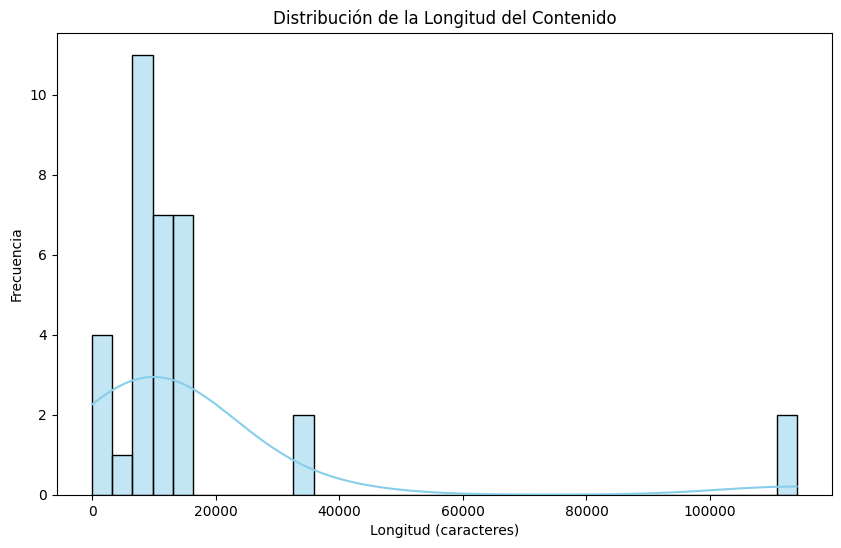

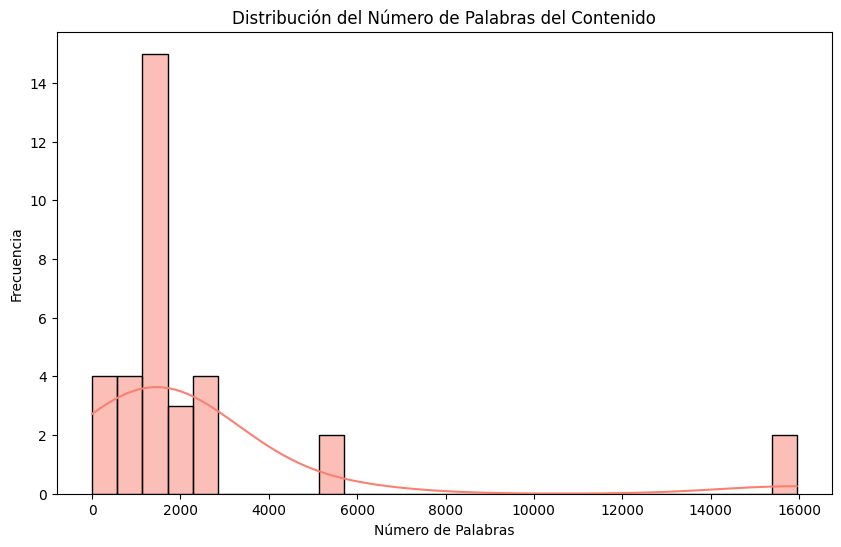

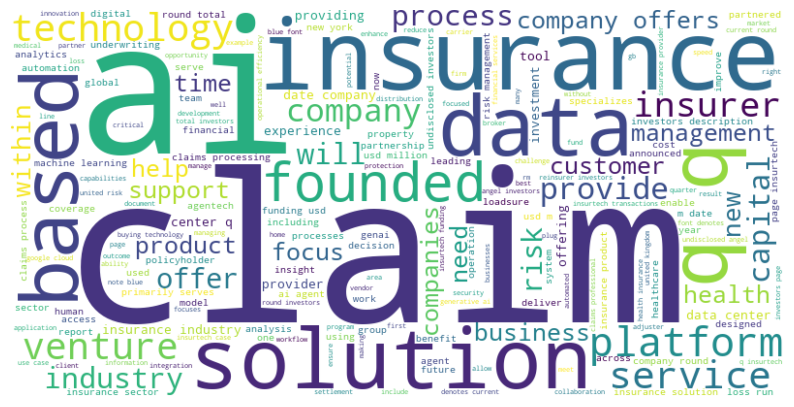

[('insurance', 1186), ('ai', 793), ('claims', 757), ('data', 520), ('q', 470), ('technology', 442), ('company', 440), ('solutions', 362), ('insurtech', 341), ('ventures', 332)]


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Distribución de la Longitud
plt.figure(figsize=(10, 6))
sns.histplot(df['Longitud'], kde=True, color='skyblue')
plt.title('Distribución de la Longitud del Contenido')
plt.xlabel('Longitud (caracteres)')
plt.ylabel('Frecuencia')
plt.show()

# Distribución del Número de Palabras
plt.figure(figsize=(10, 6))
sns.histplot(df['Palabras'], kde=True, color='salmon')
plt.title('Distribución del Número de Palabras del Contenido')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de Frecuencia de Palabras (usando un WordCloud)
from collections import Counter
import re

# Función para preprocesar y limpiar el texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación
    return texto

# Concatenar todos los textos del DataFrame
todo_el_texto = " ".join(df['Contenido'].apply(limpiar_texto))

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(todo_el_texto)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Si te gustaría ver la frecuencia de las 10 palabras más comunes:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  # Usar stopwords en español

# Contar las palabras sin las stopwords
palabras = [palabra for palabra in todo_el_texto.split() if palabra not in stop_words]
contador = Counter(palabras)

# Mostrar las 10 palabras más comunes
print(contador.most_common(10))


In [31]:

categorias = {
    'Agentech': 'Deal of the Quarter',
    'Building': 'Insurtech Team Corner',
    'Building_Technology': 'Insurtech Team Corner',
    'Buying': 'Insurtech Team Corner',
    'Buying_Technology': 'Insurtech Team Corner',
    'Concirrus': 'Incumbent Corner',
    'Cristina_Lucas': 'Thought Leadership',
    'data_highlights': 'Introduction',
    'Deal_of_the_Quarter': 'Deal of the Quarter',
    'EvolutionIQ': 'Insurtech Case Studies',
    'Gallagher\'s_Vision': 'Gallagher\'s Vision',
    'Gallagher_Basset': 'Gallagher\'s Vision',
    'Google_Cloud': 'Partnership Case Study',
    'Guidewire': 'Thought Leadership',
    'Foreword':'Introduction',
    'Incumbent_Corner': 'Incumbent Corner',
    'InsurTech_Case_Studies': 'Insurtech Case Studies',
    'InsurTech_Team_Corner': 'Insurtech Team Corner',
    'Introduction': 'Introduction',
    'Investment_Data': 'Introduction',  
    'Investor_Corner': 'Investor Corner',
    'Joe_Powell': 'Gallagher\'s Vision',
    'Loadsure': 'Partnership Case Study',
    'Matthew_Jones': 'Investor Corner',
    'Nearmap': 'Insurtech Case Studies',
    'Partnership_Case_Study': 'Partnership Case Study',
    'Pindrop': 'Insurtech Case Studies',
    'quarter_highlights': 'The Data Center',
    'Renting_Technology': 'Insurtech Team Corner',
    'The_Data_Center': 'The Data Center',
    'Thought_Leadership': 'Thought Leadership',
    'Transverse_Ventures': 'Investor Corner',
    'United_Risk': 'Incumbent Corner'
}





In [32]:
# Asignamos la categoría según el nombre de la sección usando el diccionario
df['Categoría'] = df['Sección'].map(categorias)

# Verificamos los resultados
print(df[['Sección', 'Categoría']])


                   Sección               Categoría
0                 Agentech     Deal of the Quarter
1                 Building   Insurtech Team Corner
2      Building_Technology   Insurtech Team Corner
3                   Buying   Insurtech Team Corner
4        Buying_Technology   Insurtech Team Corner
5                Concirrus        Incumbent Corner
6           Cristina_Lucas      Thought Leadership
7          data_highlights            Introduction
8      Deal_of_the_Quarter     Deal of the Quarter
9              EvolutionIQ  Insurtech Case Studies
10                Foreword            Introduction
11      Gallagher's_Vision      Gallagher's Vision
12        Gallagher_Basset      Gallagher's Vision
13            Google_Cloud  Partnership Case Study
14               Guidewire      Thought Leadership
15        Incumbent_Corner        Incumbent Corner
16  InsurTech_Case_Studies  Insurtech Case Studies
17   InsurTech_Team_Corner   Insurtech Team Corner
18            Introduction     

In [33]:
df

,Sección,Contenido,Longitud,Palabras,Categoría
0,Agentech,Page Deal of the Quarter Page Deal of the Qu...,8556,1272,Deal of the Quarter
1,Building,Page Gallagher Res InsurTech Team Corner Page...,10458,1494,Insurtech Team Corner
2,Building_Technology,Building technology in-house: then the insuran...,4248,589,Insurtech Team Corner
3,Buying,Page Gallagher Res InsurTech Team Corner Page...,10458,1494,Insurtech Team Corner
4,Buying_Technology,Buying technology: Leveraging proven Another k...,2756,392,Insurtech Team Corner
5,Concirrus,Page Incumbent Corner Concirrus and United Ri...,9655,1417,Incumbent Corner
6,Cristina_Lucas,Page Thought Leadership For claims profession...,8875,1336,Thought Leadership
7,data_highlights,Page Introduction Global InsurTech funding ha...,34357,5299,Introduction
8,Deal_of_the_Quarter,Page Deal of the Quarter Page Deal of the Qu...,8556,1272,Deal of the Quarter
9,EvolutionIQ,Page Report Participants InsurTech Case Studi...,16040,2308,Insurtech Case Studies


In [34]:
df2 = df.copy()
df2 = df2.drop_duplicates(subset='Contenido')
df2 = df2[df2['Contenido'].notna()]


In [35]:
df2

,Sección,Contenido,Longitud,Palabras,Categoría
0,Agentech,Page Deal of the Quarter Page Deal of the Qu...,8556,1272,Deal of the Quarter
1,Building,Page Gallagher Res InsurTech Team Corner Page...,10458,1494,Insurtech Team Corner
2,Building_Technology,Building technology in-house: then the insuran...,4248,589,Insurtech Team Corner
4,Buying_Technology,Buying technology: Leveraging proven Another k...,2756,392,Insurtech Team Corner
5,Concirrus,Page Incumbent Corner Concirrus and United Ri...,9655,1417,Incumbent Corner
6,Cristina_Lucas,Page Thought Leadership For claims profession...,8875,1336,Thought Leadership
7,data_highlights,Page Introduction Global InsurTech funding ha...,34357,5299,Introduction
9,EvolutionIQ,Page Report Participants InsurTech Case Studi...,16040,2308,Insurtech Case Studies
10,Foreword,foreword 4 Page 5 Introduction DR. ANDREW JOHN...,1166,196,Introduction
11,Gallagher's_Vision,Page Gallaghers Vision At Gallagher Bassett w...,13902,2210,Gallagher's Vision


In [36]:
from transformers import pipeline
import torch

device = 0 if torch.cuda.is_available() else -1
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=device)

def resumir_contenido(texto):
    chunks = [texto[i:i+1000] for i in range(0, len(texto), 1000)]
    resumenes = []
    for chunk in chunks:
        resumen = summarizer(chunk, max_length=100, min_length=30, do_sample=False)
        resumenes.append(resumen[0]['summary_text'])
    return ' '.join(resumenes)

df2['Resumen'] = df2['Contenido'].apply(resumir_contenido)


c:\Users\smart\Desktop\Codigo_Prueba_SegurosBolivar\bolivar_parte2-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


KeyboardInterrupt: 

In [115]:
#guardar archivo resumenes
df2.to_csv("resumen_secciones.csv", index=False)

In [38]:
df2 = pd.read_csv(filepath_or_buffer="D:/CHECHO/Codigo_Prueba_SegurosBolivar/bolivar_parte2-env/resumen_secciones.csv")


In [39]:
df2['Categoría'] = df2['Sección'].map(categorias)

# Verificamos los resultados
print(df[['Sección', 'Categoría']])

                   Sección               Categoría
0                 Agentech     Deal of the Quarter
1                 Building   Insurtech Team Corner
2      Building_Technology   Insurtech Team Corner
3                   Buying   Insurtech Team Corner
4        Buying_Technology   Insurtech Team Corner
5                Concirrus        Incumbent Corner
6           Cristina_Lucas      Thought Leadership
7          data_highlights            Introduction
8      Deal_of_the_Quarter     Deal of the Quarter
9              EvolutionIQ  Insurtech Case Studies
10                Foreword            Introduction
11      Gallagher's_Vision      Gallagher's Vision
12        Gallagher_Basset      Gallagher's Vision
13            Google_Cloud  Partnership Case Study
14               Guidewire      Thought Leadership
15        Incumbent_Corner        Incumbent Corner
16  InsurTech_Case_Studies  Insurtech Case Studies
17   InsurTech_Team_Corner   Insurtech Team Corner
18            Introduction     

In [40]:
df2

,Sección,Contenido,Longitud,Palabras,Categoría,Resumen
0,Agentech,Page Deal of the Quarter Page Deal of the Qu...,8556,1272,Deal of the Quarter,Agentech delivers an ensemble of advanced AI A...
1,Building,Page Gallagher Res InsurTech Team Corner Page...,10458,1494,Insurtech Team Corner,Freddie Scarratt Global Deputy Head of Gallagh...
2,Building_Technology,Building technology in-house: then the insuran...,4248,589,Insurtech Team Corner,Building technology in-house can be a good str...
3,Buying_Technology,Buying technology: Leveraging proven Another k...,2756,392,Insurtech Team Corner,Many InsurTech platforms come with a track rec...
4,Concirrus,Page Incumbent Corner Concirrus and United Ri...,9655,1417,Incumbent Corner,Concirrus revolutionizes underwriting in speci...
5,Cristina_Lucas,Page Thought Leadership For claims profession...,8875,1336,Thought Leadership,Christina Lucas is Global Head of Industry Adv...
6,data_highlights,Page Introduction Global InsurTech funding ha...,34357,5299,Introduction,Global InsurTech funding halved quarteroverqua...
7,EvolutionIQ,Page Report Participants InsurTech Case Studi...,16040,2308,Insurtech Case Studies,Nearmap and United Risk are company that offer...
8,Foreword,foreword 4 Page 5 Introduction DR. ANDREW JOHN...,1166,196,Introduction,This report is the fourth and final of our 202...
9,Gallagher's_Vision,Page Gallaghers Vision At Gallagher Bassett w...,13902,2210,Gallagher's Vision,Gallagher Bassett GB is a claims and risk mana...


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizamos el contenido
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df2['Resumen'])

# Revisamos la matriz de características
print(X.shape)


(15, 2384)


In [42]:
from transformers import pipeline
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

embedder = SentenceTransformer('all-MiniLM-L6-v2')
# Modelo QA
qa_pipeline = pipeline("question-answering", model="ahotrod/electra_large_discriminator_squad2_512")

# Función mejorada
def ask_agent(query, k=10, section_filter=None):
    # Paso 1: Filtrar por sección si se indica
    if section_filter:
        filtered_df = df2[df2['Sección'].str.contains(section_filter, case=False, na=False)]
    else:
        filtered_df = df2

    if filtered_df.empty:
        return "No se encontraron secciones relacionadas con ese filtro."

    # Paso 2: Preparar documentos y embeddings
    documents = filtered_df['Resumen'].tolist()
    sections = filtered_df['Sección'].tolist()
    doc_embeddings = embedder.encode(documents, convert_to_numpy=True)

    # Paso 3: Indexar FAISS local con ese subconjunto
    index = faiss.IndexFlatL2(doc_embeddings.shape[1])
    index.add(doc_embeddings)

    # Paso 4: Buscar los k fragmentos más cercanos
    query_vector = embedder.encode([query], convert_to_numpy=True)
    D, I = index.search(query_vector, k)

    # Paso 5: Evaluar cada fragmento con el modelo QA
    best_result = {'score': 0, 'answer': '', 'section': '', 'context': ''}
    for i in I[0]:
        result = qa_pipeline(question=query, context=documents[i])
        if result['score'] > best_result['score']:
            best_result = {
                'score': result['score'],
                'answer': result['answer'],
                'section': sections[i],
                'context': documents[i]
            }

    # Paso 6: Devolver el resultado más confiable
    if best_result['score'] < 0.15:
        return "No se encontró suficiente contexto relevante para dar una respuesta confiable."

    return {
        "Respuesta": best_result['answer'],
        "Confianza": best_result['score'],
        "Sección": best_result['section'],
        "Contexto usado": best_result['context'][:1000] + '...'  # Para no imprimir demasiado
    }



Device set to use cpu


In [43]:
query = "What are the main technological innovations in Google Cloud?"
response = ask_agent(query, section_filter="Google_Cloud")
print(response)


{'Respuesta': 'data storage analytics and machine learning', 'Confianza': 0.8357083797454834, 'Sección': 'Google_Cloud', 'Contexto usado': ' loadsure offers a range of dynamic freight insurance solutions that leverage data and AI to provide accurate pricing and near immediate certificate issuance Google Cloud offered by Google is a suite of cloud computing services including data storage analytics and machine learning. Businesses cannot profitably serve small essential data from claims documents including bills of lading. SMBs in the supply chain who invoices and shipping documents are forced to either accept cumbersome onesizefitsall annual policies or rely on inadequate carrierliability policies. Google Clouds platform provided the ideal environment for rapid prototyping and experimentation thanks to its userfriendly. Traditionally insurance claims processing has been a labor it simple to involve them ensuring high intensive and timeconsuming process often involving manual quality co

### PREGUNTAS PREESTABLECIDAS EJEMPLO

In [35]:
import pandas as pd

# Función para obtener preguntas dependiendo de la sección
def obtener_preguntas(seccion):
    if "Agentech" in seccion:
        preguntas = [
            "What new tech is Agentech using?",
            "How is AI changing what agents do?",
            "What problems does Agentech have with AI?"
        ]
    elif "Building" in seccion:
        preguntas = [
            "How is Gallagher helping insurance with new tech?",
            "What steps does Gallagher Bassett take to use new tech?",
            "How is Freddie Scarratt helping the future of insurance?"
        ]
    elif "Building_Technology" in seccion:
        preguntas = [
            "Why is it good to build tech inside the company?",
            "What problems can happen when building tech in-house?",
            "How does this help the company grow?"
        ]
    elif "Buying_Technology" in seccion:
        preguntas = [
            "Why is buying tech a good idea?",
            "How can it help companies grow faster?",
            "What problems come with using tech from others?"
        ]
    elif "Concirrus" in seccion:
        preguntas = [
            "How is Concirrus changing insurance work?",
            "How does Concirrus help with risk and decisions?",
            "How do Concirrus and insurers work together?"
        ]
    elif "Cristina_Lucas" in seccion:
        preguntas = [
            "What makes Christina Lucas a good leader?",
            "How does she help the insurance world?",
            "What has she done to bring in new tech?"
        ]
    elif "data_highlights" in seccion:
        preguntas = [
            "How has InsurTech funding changed recently?",
            "Why is the funding going up or down?",
            "What do the numbers say about the industry?"
        ]
    elif "EvolutionIQ" in seccion:
        preguntas = [
            "What can we learn from EvolutionIQ?",
            "How do companies like Nearmap use tech for risk?",
            "What are the main lessons from these examples?"
        ]
    elif "Foreword" in seccion:
        preguntas = [
            "What is this foreword about?",
            "How does Dr. Andrew John help this report?",
            "Why is the foreword important?"
        ]
    elif "Gallagher's_Vision" in seccion:
        preguntas = [
            "How does Gallagher Bassett plan for the future?",
            "What are the main values of Gallagher Bassett?",
            "How does this help the insurance industry?"
        ]
    elif "Google_Cloud" in seccion:
        preguntas = [
            "How does Loadsure use Google Cloud?",
            "What is good about the Loadsure–Google Cloud team?",
            "How does cloud tech help with growth?"
        ]
    elif "Investment_Data" in seccion:
        preguntas = [
            "What are the new trends in InsurTech investment?",
            "What do these numbers say about the market?",
            "What are the key points from this report?"
        ]
    elif "Investor_Corner" in seccion:
        preguntas = [
            "What should investors know about InsurTech?",
            "What does Matthew Jones think about the future?",
            "What are the best ways to invest in InsurTech?"
        ]
    elif "Q4_Insurtech" in seccion:
        preguntas = [
            "What happened in Q4 2014 in InsurTech?",
            "How does Q4 show global trends?",
            "What went well or bad in Q4?"
        ]
    elif "quarter_highlights" in seccion:
        preguntas = [
            "What are the main numbers from this quarter?",
            "How do these highlights help us understand the industry?",
            "What do these numbers say about growth?"
        ]
    return preguntas

# Lista de secciones (ejemplo, tú debes tener tus propias secciones)
secciones = [
    "Agentech", "Building", "Building_Technology", "Buying_Technology", "Concirrus",
    "Cristina_Lucas", "data_highlights", "EvolutionIQ", "Foreword", "Gallagher's_Vision",
    "Google_Cloud", "Investment_Data", "Investor_Corner", "Q4_Insurtech", "quarter_highlights"
]

# Crear una lista para almacenar las preguntas y sus respectivas secciones
data = []

# Generar las preguntas para cada sección y almacenarlas en la lista
for seccion in secciones:
    preguntas = obtener_preguntas(seccion)
    for pregunta in preguntas:
        data.append([seccion, pregunta])

# Crear el DataFrame a partir de la lista
questions_df = pd.DataFrame(data, columns=['Sección', 'Pregunta'])

# Verifica cómo se ve el DataFrame con las preguntas generadas
print(questions_df.head())

# Guardar el DataFrame generado con las preguntas en un archivo CSV
questions_df.to_csv("generated_questions.csv", index=False, encoding="utf-8")


    Sección                                           Pregunta
0  Agentech                   What new tech is Agentech using?
1  Agentech                 How is AI changing what agents do?
2  Agentech          What problems does Agentech have with AI?
3  Building  How is Gallagher helping insurance with new tech?
4  Building  What steps does Gallagher Bassett take to use ...


In [36]:
import pandas as pd
# Modelo de embeddings (puedes cambiarlo si quieres algo más potente)
embedder = SentenceTransformer('all-MiniLM-L6-v2')
# Paso 1: Cargar el archivo CSV que contiene las preguntas
# Asegúrate de que el archivo CSV tenga una columna llamada 'Pregunta'
questions_df = pd.read_csv("C:/Users/smart/Desktop/Codigo_Prueba_SegurosBolivar/bolivar_parte2-env/generated_questions.csv")  # Ruta al archivo CSV con las preguntas

# Verifica cómo se ve el archivo para asegurarte que tiene la columna correcta
print(questions_df.head())

from transformers import pipeline
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Modelo QA
qa_pipeline = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad")

# Función mejorada
def ask_agent(query, k=10, section_filter=None):
    # Paso 1: Filtrar por sección si se indica
    if section_filter:
        filtered_df = df2[df2['Sección'].str.contains(section_filter, case=False, na=False)]
    else:
        filtered_df = df2

    if filtered_df.empty:
        return {
            "Respuesta": "No se encontraron secciones relacionadas con ese filtro.",
            "Confianza": 0.0,
            "Sección": "N/A",
            "Contexto usado": "N/A"
        }

    # Paso 2: Preparar documentos y embeddings
    documents = filtered_df['Resumen'].tolist()
    sections = filtered_df['Sección'].tolist()
    doc_embeddings = embedder.encode(documents, convert_to_numpy=True)

    # Paso 3: Indexar FAISS local con ese subconjunto
    index = faiss.IndexFlatL2(doc_embeddings.shape[1])
    index.add(doc_embeddings)

    # Paso 4: Buscar los k fragmentos más cercanos
    query_vector = embedder.encode([query], convert_to_numpy=True)
    D, I = index.search(query_vector, k)

    # Paso 5: Evaluar cada fragmento con el modelo QA
    best_result = {'score': 0, 'answer': '', 'section': '', 'context': ''}
    for i in I[0]:
        result = qa_pipeline(question=query, context=documents[i])
        if result['score'] > best_result['score']:
            best_result = {
                'score': result['score'],
                'answer': result['answer'],
                'section': sections[i],
                'context': documents[i]
            }

    # Paso 6: Devolver el resultado más confiable
    if best_result['score'] < 0.15:
        return {
            "Respuesta": "No se encontró suficiente contexto relevante para dar una respuesta confiable.",
            "Confianza": best_result['score'],
            "Sección": best_result['section'],
            "Contexto usado": best_result['context'][:1000] + '...'
        }

    return {
        "Respuesta": best_result['answer'],
        "Confianza": best_result['score'],
        "Sección": best_result['section'],
        "Contexto usado": best_result['context'][:1000] + '...'  # Para no imprimir demasiado
    }


responses = []
for query in questions_df['Pregunta']:  # Asumiendo que las preguntas están en la columna 'Pregunta'
    # Aquí puedes ajustar 'Agentech' con la sección que corresponda
    response = ask_agent(query, section_filter="Agentech")  
    responses.append({
        "Query": query,
        "Respuesta": response['Respuesta'],
        "Confianza": response['Confianza'],
        "Sección": response['Sección'],
        "Contexto": response['Contexto usado']
    })

df_responses = pd.DataFrame(responses)

# Paso 5: Exportar las respuestas a un archivo CSV
df_responses.to_csv("respuestas_generadas.csv", index=False, encoding="utf-8")

# Paso 6: Verifica las respuestas generadas
print(df_responses)

Device set to use cpu


    Sección                                           Pregunta
0  Agentech                   What new tech is Agentech using?
1  Agentech                 How is AI changing what agents do?
2  Agentech          What problems does Agentech have with AI?
3  Building  How is Gallagher helping insurance with new tech?
4  Building  What steps does Gallagher Bassett take to use ...
                                                Query  \
0                    What new tech is Agentech using?   
1                  How is AI changing what agents do?   
2           What problems does Agentech have with AI?   
3   How is Gallagher helping insurance with new tech?   
4   What steps does Gallagher Bassett take to use ...   
5   How is Freddie Scarratt helping the future of ...   
6   How is Gallagher helping insurance with new tech?   
7   What steps does Gallagher Bassett take to use ...   
8   How is Freddie Scarratt helping the future of ...   
9                     Why is buying tech a good idea

In [44]:
ask_agent("What does Christina Lucas?",section_filter="EvolutionIQ")


{'Respuesta': 'Guidewire deepfake detection',
 'Confianza': 0.4506857097148895,
 'Sección': 'EvolutionIQ',
 'Contexto usado': 'Nearmap and United Risk are company that offers highresolution collaborating to create an AIpowered aerial imagery to PC insurers. EvolutionIQ Gallaghers Vision developed one of the worlds first AIdriven claims guidance. Christina Lucas Guidewire deepfake detection committed to prioritizing trust and security. Matthew Jones shares his views on advanced AI agents to enhance the the current state of InsurTech funding efficiency of insurance claims processing. He also discusses the potential impact of AI on the by supporting desk adjusters and insurance industry claim handlers. Nearmap applies AI and computer vision to its imagery database Betterview property intelligence for claims. Quicker assessments better outcomes property insights. These are delivered through the Betterview and The Betterview platform. ImpactResponse System by Nearmap integrates high lives a

In [45]:
df2

,Sección,Contenido,Longitud,Palabras,Categoría,Resumen
0,Agentech,Page Deal of the Quarter Page Deal of the Qu...,8556,1272,Deal of the Quarter,Agentech delivers an ensemble of advanced AI A...
1,Building,Page Gallagher Res InsurTech Team Corner Page...,10458,1494,Insurtech Team Corner,Freddie Scarratt Global Deputy Head of Gallagh...
2,Building_Technology,Building technology in-house: then the insuran...,4248,589,Insurtech Team Corner,Building technology in-house can be a good str...
3,Buying_Technology,Buying technology: Leveraging proven Another k...,2756,392,Insurtech Team Corner,Many InsurTech platforms come with a track rec...
4,Concirrus,Page Incumbent Corner Concirrus and United Ri...,9655,1417,Incumbent Corner,Concirrus revolutionizes underwriting in speci...
5,Cristina_Lucas,Page Thought Leadership For claims profession...,8875,1336,Thought Leadership,Christina Lucas is Global Head of Industry Adv...
6,data_highlights,Page Introduction Global InsurTech funding ha...,34357,5299,Introduction,Global InsurTech funding halved quarteroverqua...
7,EvolutionIQ,Page Report Participants InsurTech Case Studi...,16040,2308,Insurtech Case Studies,Nearmap and United Risk are company that offer...
8,Foreword,foreword 4 Page 5 Introduction DR. ANDREW JOHN...,1166,196,Introduction,This report is the fourth and final of our 202...
9,Gallagher's_Vision,Page Gallaghers Vision At Gallagher Bassett w...,13902,2210,Gallagher's Vision,Gallagher Bassett GB is a claims and risk mana...


## FRONTEND - INTERFAZ GRÁFICA

In [25]:
df2.to_csv('df2_final.csv', index=False)

Prueba con embeddings en el df2

In [46]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import json

df2 = pd.read_csv("D:/CHECHO/Codigo_Prueba_SegurosBolivar/bolivar_parte2-env/df2_final.csv")
model = SentenceTransformer('all-MiniLM-L6-v2')

# Crear embeddings
df2['embedding'] = df2['Resumen'].apply(lambda x: model.encode(x).tolist())

# Guardar el embedding como string JSON para que sea parseable luego
df2['embedding'] = df2['embedding'].apply(json.dumps)

# Guardar todo el dataframe
df2.to_csv("df2_final_con_embeddings.csv", index=False)



In [27]:
df2

,Sección,Contenido,Longitud,Palabras,Categoría,Resumen,embedding
0,Agentech,Page Deal of the Quarter Page Deal of the Qu...,8556,1272,Deal of the Quarter,Agentech delivers an ensemble of advanced AI A...,"[-0.12445635348558426, 0.01697601191699505, -0..."
1,Building,Page Gallagher Res InsurTech Team Corner Page...,10458,1494,Insurtech Team Corner,Freddie Scarratt Global Deputy Head of Gallagh...,"[-0.09967924654483795, 0.004358689300715923, 0..."
2,Building_Technology,Building technology in-house: then the insuran...,4248,589,Insurtech Team Corner,Building technology in-house can be a good str...,"[-0.047649551182985306, 0.07029767334461212, -..."
3,Buying_Technology,Buying technology: Leveraging proven Another k...,2756,392,Insurtech Team Corner,Many InsurTech platforms come with a track rec...,"[-0.0521073117852211, 0.05117018148303032, -0...."
4,Concirrus,Page Incumbent Corner Concirrus and United Ri...,9655,1417,Incumbent Corner,Concirrus revolutionizes underwriting in speci...,"[-0.1352076679468155, 0.0715891569852829, -0.0..."
5,Cristina_Lucas,Page Thought Leadership For claims profession...,8875,1336,Thought Leadership,Christina Lucas is Global Head of Industry Adv...,"[-0.11781495809555054, 0.08411763608455658, -0..."
6,data_highlights,Page Introduction Global InsurTech funding ha...,34357,5299,Introduction,Global InsurTech funding halved quarteroverqua...,"[-0.005867358297109604, -0.08111856132745743, ..."
7,EvolutionIQ,Page Report Participants InsurTech Case Studi...,16040,2308,Insurtech Case Studies,Nearmap and United Risk are company that offer...,"[-0.03406193479895592, 0.046110786497592926, 0..."
8,Foreword,foreword 4 Page 5 Introduction DR. ANDREW JOHN...,1166,196,Introduction,This report is the fourth and final of our 202...,"[-0.05771203339099884, 0.03614133223891258, -0..."
9,Gallagher's_Vision,Page Gallaghers Vision At Gallagher Bassett w...,13902,2210,Gallagher's Vision,Gallagher Bassett GB is a claims and risk mana...,"[-0.06830538064241409, -0.03310341760516167, 0..."


In [266]:
import torch

# Definir una función para convertir los tensores a flotantes
def parse_embedding(embedding_list):
    # Si la entrada es una lista de tensores
    if isinstance(embedding_list, list):
        # Convertir cada tensor a flotante usando .item()
        return [tensor.item() if isinstance(tensor, torch.Tensor) else tensor for tensor in embedding_list]
    return embedding_list  # Si no es una lista, regresarlo tal cual

# Aplicamos esta función a la columna 'embedding'
df2['embedding'] = df2['embedding'].apply(lambda x: parse_embedding(x) if isinstance(x, list) else x)

# Verificamos el tipo después de la conversión
print(type(df2['embedding'][0][0]))  # Debería imprimir <class 'float'>
print(df2['embedding'].head())  # Para revisar los primeros resultados





<class 'torch.Tensor'>
0    [tensor(-0.1245), tensor(0.0170), tensor(-0.05...
1    [tensor(-0.0997), tensor(0.0044), tensor(0.009...
2    [tensor(-0.0476), tensor(0.0703), tensor(-0.00...
4    [tensor(-0.0521), tensor(0.0512), tensor(-0.01...
5    [tensor(-0.1352), tensor(0.0716), tensor(-0.03...
Name: embedding, dtype: object


In [264]:
print(type(df2['embedding'][0][0]))  # Debe devolver <class 'float'>



<class 'torch.Tensor'>


In [259]:
def parse_embedding(embedding_list):
    # Asegurarse de que la entrada sea una lista de números
    if isinstance(embedding_list, list) and all(isinstance(i, (int, float)) for i in embedding_list):
        return torch.tensor(embedding_list, dtype=torch.float32)
    return embedding_list  # Si no es lista válida, se retorna tal cual


In [254]:
# Verificar los tipos de datos en la columna 'embedding'
print(df2['embedding'].apply(type).value_counts())



embedding
<class 'list'>    15
Name: count, dtype: int64


In [255]:
# Comprobar una muestra de la columna 'embedding'
print(df2['embedding'].head())


0    [-0.12445635348558426, 0.01697601191699505, -0...
1    [-0.09967924654483795, 0.004358689300715923, 0...
2    [-0.047649551182985306, 0.07029767334461212, -...
4    [-0.0521073117852211, 0.05117018148303032, -0....
5    [-0.1352076679468155, 0.0715891569852829, -0.0...
Name: embedding, dtype: object


In [212]:
from sentence_transformers import SentenceTransformer, util
import torch

# Inicializa el modelo de embeddings
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# La pregunta a procesar
pregunta = "¿Cuál es la tendencia de AI en los procesos de reclamos?"

# Obtener el embedding de la pregunta
pregunta_emb = embedder.encode(pregunta, convert_to_tensor=True)


In [227]:
df2

,Sección,Contenido,Longitud,Palabras,Categoría,Resumen,embedding
0,Agentech,Page Deal of the Quarter Page Deal of the Qu...,8556,1272,Deal of the Quarter,Agentech delivers an ensemble of advanced AI A...,"[tensor(-0.1245), tensor(0.0170), tensor(-0.05..."
1,Building,Page Gallagher Res InsurTech Team Corner Page...,10458,1494,Insurtech Team Corner,Freddie Scarratt Global Deputy Head of Gallagh...,"[tensor(-0.0997), tensor(0.0044), tensor(0.009..."
2,Building_Technology,Building technology in-house: then the insuran...,4248,589,Insurtech Team Corner,Building technology in-house can be a good str...,"[tensor(-0.0476), tensor(0.0703), tensor(-0.00..."
4,Buying_Technology,Buying technology: Leveraging proven Another k...,2756,392,Insurtech Team Corner,Many InsurTech platforms come with a track rec...,"[tensor(-0.0521), tensor(0.0512), tensor(-0.01..."
5,Concirrus,Page Incumbent Corner Concirrus and United Ri...,9655,1417,Incumbent Corner,Concirrus revolutionizes underwriting in speci...,"[tensor(-0.1352), tensor(0.0716), tensor(-0.03..."
6,Cristina_Lucas,Page Thought Leadership For claims profession...,8875,1336,Thought Leadership,Christina Lucas is Global Head of Industry Adv...,"[tensor(-0.1178), tensor(0.0841), tensor(-0.01..."
7,data_highlights,Page Introduction Global InsurTech funding ha...,34357,5299,Introduction,Global InsurTech funding halved quarteroverqua...,"[tensor(-0.0059), tensor(-0.0811), tensor(0.04..."
9,EvolutionIQ,Page Report Participants InsurTech Case Studi...,16040,2308,Insurtech Case Studies,Nearmap and United Risk are company that offer...,"[tensor(-0.0341), tensor(0.0461), tensor(0.017..."
10,Foreword,foreword 4 Page 5 Introduction DR. ANDREW JOHN...,1166,196,Introduction,This report is the fourth and final of our 202...,"[tensor(-0.0577), tensor(0.0361), tensor(-0.04..."
11,Gallagher's_Vision,Page Gallaghers Vision At Gallagher Bassett w...,13902,2210,Gallagher's Vision,Gallagher Bassett GB is a claims and risk mana...,"[tensor(-0.0683), tensor(-0.0331), tensor(0.01..."


In [226]:
import torch

# Función para convertir los tensores dentro de una lista a sus valores flotantes
def convertir_tensor_a_flotante(embedding):
    # Comprobamos si es una lista de tensores
    if isinstance(embedding, list):
        # Convertimos cada tensor a su valor flotante
        return [tensor.item() if isinstance(tensor, torch.Tensor) else tensor for tensor in embedding]
    return embedding

# Aplicamos la función de conversión a cada valor en la columna 'embedding'
df2['embedding'] = df2['embedding'].apply(lambda x: convertir_tensor_a_flotante(x))

# Verificamos los primeros valores
print(df2['embedding'].head())



0    [tensor(-0.1245), tensor(0.0170), tensor(-0.05...
1    [tensor(-0.0997), tensor(0.0044), tensor(0.009...
2    [tensor(-0.0476), tensor(0.0703), tensor(-0.00...
4    [tensor(-0.0521), tensor(0.0512), tensor(-0.01...
5    [tensor(-0.1352), tensor(0.0716), tensor(-0.03...
Name: embedding, dtype: object


In [213]:
# Calcular la similitud de coseno entre la pregunta y los embeddings de df2
similitudes = [float(util.pytorch_cos_sim(pregunta_emb, emb)) for emb in df2['embedding']]

# Obtener el índice del embedding más similar
indice_max = similitudes.index(max(similitudes))

# Obtener la fila correspondiente con la respuesta más similar
respuesta = df2.iloc[indice_max]

# Mostrar los resultados
print(f"Respuesta: {respuesta['Resumen']}")
print(f"Sección: {respuesta['Sección']}")
print(f"Categoría: {respuesta['Categoría']}")


Respuesta: This report is the fourth and final of our 2024 series: the role of AI in the (re)insurance value chain. In the first quarter of 2024, we saw a large number of deals through which to view the complex field that is Artificial. In Q2, USD1.27 billion was raised across 82 deals, increasing have presented which AI products are generating the best results. mocratization of capital.
Sección: Foreword
Categoría: Introduction


In [214]:
df2.to_csv("respuestas_generadas_embbeding.csv", index=False, encoding="utf-8")

In [196]:
from transformers import pipeline

# Tu modelo QA
qa_model = pipeline('question-answering', model='deepset/roberta-base-squad2')

def responder_pregunta(pregunta, top_k=3, umbral_confianza=0.3):
    # 1. Embedding de la pregunta
    pregunta_emb = embedder.encode(pregunta, convert_to_tensor=True)

    # 2. Calcular similitud con cada embedding del DataFrame
    similitudes = [float(util.pytorch_cos_sim(pregunta_emb, emb)) for emb in df2['embedding']]

    # 3. Seleccionar top-k secciones más similares
    top_indices = sorted(range(len(similitudes)), key=lambda i: similitudes[i], reverse=True)[:top_k]
    
    mejores_respuestas = []

    for idx in top_indices:
        contexto = df2.iloc[idx]['Resumen']
        entrada_qa = {
            'question': pregunta,
            'context': contexto
        }
        resultado = qa_model(entrada_qa)
        
        mejores_respuestas.append({
            'Respuesta': resultado.get('answer'),
            'Confianza': resultado.get('score'),
            'Sección': df2.iloc[idx]['Sección'],
            'Categoría': df2.iloc[idx]['Categoría'],
            'Contexto usado': contexto[:400] + "..."  # resumen corto
        })

    # Elegimos la mejor si supera el umbral
    respuesta_filtrada = max(mejores_respuestas, key=lambda r: r['Confianza'])

    if respuesta_filtrada['Confianza'] >= umbral_confianza:
        return respuesta_filtrada
    else:
        return {
            'Respuesta': "No encontré una respuesta confiable.",
            'Confianza': respuesta_filtrada['Confianza'],
            'Sección': respuesta_filtrada['Sección'],
            'Categoría': respuesta_filtrada['Categoría'],
            'Contexto usado': respuesta_filtrada['Contexto usado']
        }


Device set to use cpu


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from transformers import pipeline


# Modelo de embeddings
embedder = SentenceTransformer('all-MiniLM-L6-v2')
# Embeddings del resumen
df2['embedding'] = df2['Resumen'].apply(lambda x: embedder.encode(x, convert_to_tensor=True))

# Modelo QA
qa_model = pipeline('question-answering', model='deepset/roberta-base-squad2')

def responder_pregunta(pregunta, top_k=3, umbral_confianza=0.15):
    pregunta_emb = embedder.encode(pregunta, convert_to_tensor=True)

    similitudes = [float(util.pytorch_cos_sim(pregunta_emb, emb)) for emb in df2['embedding']]
    top_indices = sorted(range(len(similitudes)), key=lambda i: similitudes[i], reverse=True)[:top_k]

    mejores_respuestas = []

    for idx in top_indices:
        contexto = df2.iloc[idx]['Resumen']
        entrada_qa = {
            'question': pregunta,
            'context': contexto
        }
        resultado = qa_model(entrada_qa)

        mejores_respuestas.append({
            'Respuesta': resultado.get('answer'),
            'Confianza': resultado.get('score'),
            'Sección': df2.iloc[idx]['Sección'],
            'Categoría': df2.iloc[idx]['Categoría'],
            'Contexto usado': contexto[:400] + "..."
        })

    respuesta_filtrada = max(mejores_respuestas, key=lambda r: r['Confianza'])

    if respuesta_filtrada['Confianza'] >= umbral_confianza:
        return respuesta_filtrada
    else:
        return {
            'Respuesta': "No encontré una respuesta confiable.",
            'Confianza': respuesta_filtrada['Confianza'],
            'Sección': respuesta_filtrada['Sección'],
            'Categoría': respuesta_filtrada['Categoría'],
            'Contexto usado': respuesta_filtrada['Contexto usado']
        }

# 🧪 Ejemplo de uso
pregunta_usuario = "¿Who is Christina Lucas?"
respuesta = responder_pregunta(pregunta_usuario)
print(respuesta)


Device set to use cpu


{'Respuesta': 'Global Head of Industry Advisory at Guidewire', 'Confianza': 0.691547155380249, 'Sección': 'Cristina_Lucas', 'Categoría': 'Thought Leadership', 'Contexto usado': 'Christina Lucas is Global Head of Industry Advisory at Guidewire. Her insurance career has been primarily across the insurance ecosystem. She was President of Envista Forensics leading a global team of forensic engineers investigating major loss claims. ACORD implemented the first electronic data interchange EDI operations thanks to their need for structured and unstructured protocols for the insu...'}


In [174]:

df2.to_csv("contenido_secciones_resumidas.csv", index=False, encoding="utf-8")


In [200]:
df2

,Sección,Contenido,Longitud,Palabras,Categoría,Resumen,embedding
0,Agentech,Page Deal of the Quarter Page Deal of the Qu...,8556,1272,Deal of the Quarter,Agentech delivers an ensemble of advanced AI A...,"[tensor(-0.1245), tensor(0.0170), tensor(-0.05..."
1,Building,Page Gallagher Res InsurTech Team Corner Page...,10458,1494,Insurtech Team Corner,Freddie Scarratt Global Deputy Head of Gallagh...,"[tensor(-0.0997), tensor(0.0044), tensor(0.009..."
2,Building_Technology,Building technology in-house: then the insuran...,4248,589,Insurtech Team Corner,Building technology in-house can be a good str...,"[tensor(-0.0476), tensor(0.0703), tensor(-0.00..."
4,Buying_Technology,Buying technology: Leveraging proven Another k...,2756,392,Insurtech Team Corner,Many InsurTech platforms come with a track rec...,"[tensor(-0.0521), tensor(0.0512), tensor(-0.01..."
5,Concirrus,Page Incumbent Corner Concirrus and United Ri...,9655,1417,Incumbent Corner,Concirrus revolutionizes underwriting in speci...,"[tensor(-0.1352), tensor(0.0716), tensor(-0.03..."
6,Cristina_Lucas,Page Thought Leadership For claims profession...,8875,1336,Thought Leadership,Christina Lucas is Global Head of Industry Adv...,"[tensor(-0.1178), tensor(0.0841), tensor(-0.01..."
7,data_highlights,Page Introduction Global InsurTech funding ha...,34357,5299,Introduction,Global InsurTech funding halved quarteroverqua...,"[tensor(-0.0059), tensor(-0.0811), tensor(0.04..."
9,EvolutionIQ,Page Report Participants InsurTech Case Studi...,16040,2308,Insurtech Case Studies,Nearmap and United Risk are company that offer...,"[tensor(-0.0341), tensor(0.0461), tensor(0.017..."
10,Foreword,foreword 4 Page 5 Introduction DR. ANDREW JOHN...,1166,196,Introduction,This report is the fourth and final of our 202...,"[tensor(-0.0577), tensor(0.0361), tensor(-0.04..."
11,Gallagher's_Vision,Page Gallaghers Vision At Gallagher Bassett w...,13902,2210,Gallagher's Vision,Gallagher Bassett GB is a claims and risk mana...,"[tensor(-0.0683), tensor(-0.0331), tensor(0.01..."


In [175]:
import streamlit as st


POST FINAL ##


# TRADUCCION

In [193]:
from deep_translator import GoogleTranslator

def traducir(texto, origen='en', destino='es'):
    try:
        return GoogleTranslator(source=origen, target=destino).translate(texto)
    except Exception as e:
        return f"[Error al traducir]: {str(e)}"


In [194]:
respuesta_raw = responder_pregunta(pregunta_usuario)

respuesta_traducida = {
    'Respuesta': traducir(respuesta_raw['Respuesta'], 'en', 'es'),
    'Sección': traducir(respuesta_raw['Sección'], 'en', 'es'),
    'Categoría': traducir(respuesta_raw['Categoría'], 'en', 'es'),
    'Confianza': respuesta_raw['Confianza'],
    'Contexto usado': traducir(respuesta_raw['Contexto usado'], 'en', 'es')
}




In [29]:
from deep_translator import GoogleTranslator
import re

# Función para limpiar texto de caracteres no deseados
def limpiar_texto(texto):
    # Eliminar caracteres especiales y saltos de línea innecesarios
    return re.sub(r'[\x00-\x1F\x7F-\x9F]+', ' ', texto).strip()

# Función para traducir textos
def traducir_texto(texto, idioma_destino='es'):
    try:
        texto_limpio = limpiar_texto(texto)
        return GoogleTranslator(source='auto', target=idioma_destino).translate(texto_limpio)
    except Exception as e:
        print(f"Error al traducir: {e}")
        return texto


